In [1]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',9001)

# Inspiration:
1. which animals are most likely to bite humans?
    - bite_date
    - SpeciesIDDesc
    - GenderIDDesc

2. Are some dog breeds more likely to bite?
    - SpeciesIDDesc == Dog
    - BreedIDDesc
    - GenderIDDesc

3. What factors are most strongly associated with a positive rabies ID?
    - SpeciesIDDesc == rabbit
    - GenderIDDesc
    - color
    - ResultsIDDesc

In [2]:
# read File
df = pd.read_csv('Health_AnimalBites.csv')

In [3]:
df.tail()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
8998,2017-09-05 00:00:00,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
8999,2017-09-07 00:00:00,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
9000,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
9001,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN
9002,2017-09-07 00:00:00,DOG,BOXER,NaN,BRN BLK,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN


In [4]:
# Exploring Data

df.shape

(9003, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [6]:
df.SpeciesIDDesc.nunique()

# Berarti sangat banyak baris yang duplikat, artinya 1 baris bisa mewakili nilai dari baris sebelumnya

9

In [7]:
df['bite_date'] = df['bite_date'].str.replace(' 00:00:00','')

In [8]:
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07,maul,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [9]:
# CLEANING , PREPROCESSING , FEATURE , ENGINEERING

# menghapus bagian 00 belakang
df['bite_date'] = df['bite_date'].str.replace(' 00:00:00','')

# mengisi nilai NaN dengan tanggal default
df['bite_date'].fillna('2017-01-01', inplace=True)

# mengedit baris dengan format tahun yang mengalami typo
df['bite_date'] = df['bite_date'].str.replace('5013-07-15','2017-07-15')
df['bite_date'] = df['bite_date'].str.replace('2101-02-18','2011-02-18')
df['bite_date'] = df['bite_date'].str.replace('2201-01-21','2012-01-21')
df['bite_date'] = df['bite_date'].str.replace('2201-02-21','2012-02-21')
df['bite_date'] = df['bite_date'].str.replace('2201-05-01','2012-05-01')

# mengubah dari str menjadi datetime
df['bite_date'] = pd.to_datetime(df['bite_date'])

df = df.sort_values('bite_date',ascending=True)

# Sisanya tidak saya perbaiki dikarenakan saya tidak menggunakan data tersebut

In [46]:
# 1. which animals are most likely to bite humans?

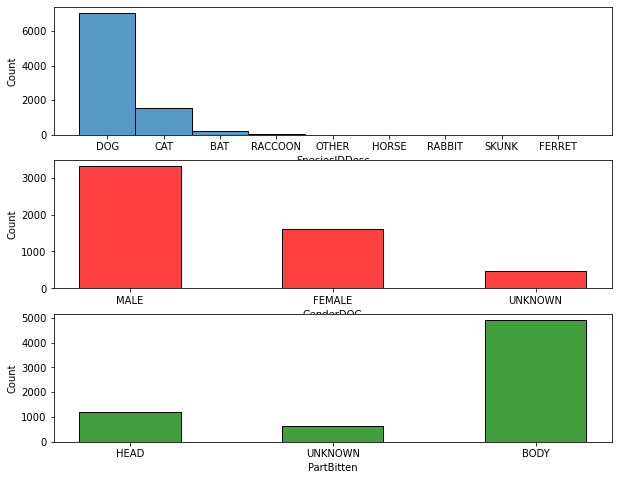

In [59]:
plt.figure(figsize=(10,8))

plt.subplot(311)
sns.histplot(data=df,x='SpeciesIDDesc')

plt.subplot(312)
sns.histplot(data=df[df['SpeciesIDDesc'] == 'DOG'],x='GenderIDDesc',shrink=0.5,color='red')
plt.xlabel('GenderDOG')

plt.subplot(313)
sns.histplot(data=df[df['SpeciesIDDesc'] == 'DOG'],x='WhereBittenIDDesc',shrink=0.5,color='green')
plt.xlabel('PartBitten')

plt.show()

In [48]:
# 2. Are some dog breeds more likely to bite?

In [50]:
df_no2 = df.loc[:,['SpeciesIDDesc','BreedIDDesc','GenderIDDesc']]

In [60]:
df_no2 = df_no2[df['SpeciesIDDesc'] == 'DOG']

In [69]:
df_no2.BreedIDDesc.value_counts()

PIT BULL             1101
GERM SHEPHERD         327
LABRADOR RETRIV       253
BOXER                 181
CHICHAUHUA            165
SHIH TZU              119
BEAGLE                115
ROTTWEILER             86
AAUST. TERR.           78
DACHSHUND              67
GOLD RETRIEVER         60
POODLE                 50
BORDER COLLIE          47
CHOW CHOW              46
YORKSHIRE TERRIER      46
GREAT DANE             43
CANE CORSO             40
SCHNAUZER              39
POMERANIAN             38
HUSKY                  34
BULL DOG               34
OTHER                  33
DOBERMAN               32
COCKER SPAINEL         30
BOSTON TERRIER         29
AKITA                  28
ENGLISH BULLDOG        28
MALTASE                28
MIN PIN                27
MASTIF                 27
SIBERAN HUSKY          26
AM BULLDOG             26
BLACK LAB              23
BULLMASTIFF            22
BASSET HOUND           22
AMER. BULL DOG         21
PUG                    20
RAT TERRIER            20
BORDER COLLI

In [74]:
df_no2 = df[df['BreedIDDesc'].isin(['PIT BULL','GERM SHEPHERD','LABRADOR RETRIV','BOXER','CHICHAUHUA'])]

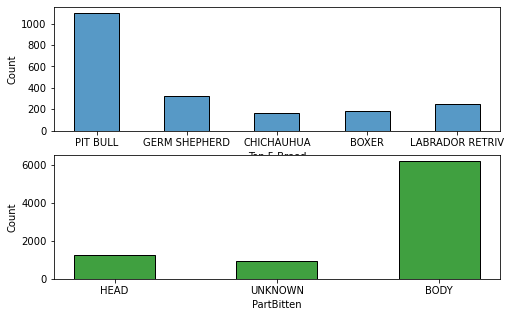

In [83]:
plt.figure(figsize=(8,5))

plt.subplot(211)
sns.histplot(data=df_no2,x='BreedIDDesc',shrink=0.5)
plt.xlabel('Top 5 Breed')

plt.subplot(212)
sns.histplot(data=df_no2,x=df['WhereBittenIDDesc'],shrink=0.5,color='green')
plt.xlabel('PartBitten')


plt.show()

In [ ]:
# 3. What factors are most strongly associated with a positive rabies ID?